In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
DF1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/PATIW.csv')

In [106]:
DF1.head()

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4


In [107]:
DF1.shape

(23791, 74)

In [108]:
from sklearn.preprocessing import StandardScaler
DF2  = DF1.drop(['weather'], axis = 1)
scaler = StandardScaler()
scaler.fit(DF2)
X_scaled = scaler.transform(DF2)

In [109]:
DF2.shape

(23791, 73)

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 25)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('원본 데이터 형태:', str(X_scaled.shape))
print('축소된 데이터 형태:', str(X_pca.shape))



원본 데이터 형태: (23791, 73)
축소된 데이터 형태: (23791, 25)


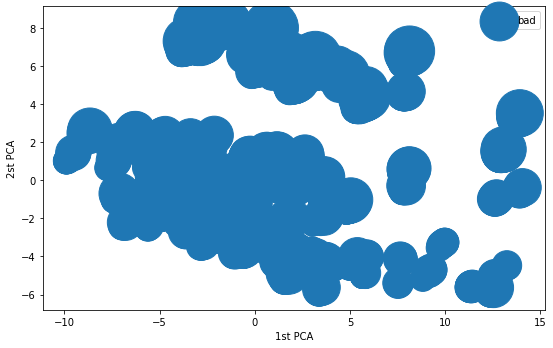

In [111]:
plt.figure(figsize = (9,6))
plt.scatter(X_pca[:,0], X_pca[:,1], DF2.price)
plt.legend(['bad', 'good'], loc = 'best')
plt.gca().set_aspect("equal")

plt.xlabel('1st PCA')
plt.ylabel('2st PCA')
plt.show()


In [112]:
print("PCA 주성분 형태 : " , pca.components_.shape)

PCA 주성분 형태 :  (25, 73)


In [113]:
print("PCA 주성분 형태 : " , pca.components_)

PCA 주성분 형태 :  [[ 0.05565913  0.00709842 -0.01118015 ...  0.04570187 -0.0397008
  -0.09476873]
 [ 0.11278583  0.00332988  0.00788558 ...  0.0388685  -0.0360487
   0.09164425]
 [-0.05981303 -0.00560458 -0.00170913 ...  0.20151244  0.02422797
   0.02199533]
 ...
 [ 0.01337706  0.07326072 -0.02931979 ...  0.06291781 -0.11926112
   0.1637579 ]
 [-0.08716215 -0.01761175 -0.09360077 ... -0.11925709 -0.16092288
   0.04855144]
 [-0.0927928  -0.00073521  0.08411242 ... -0.17186214  0.09506517
   0.06253007]]


Text(0, 0.5, 'PCA')

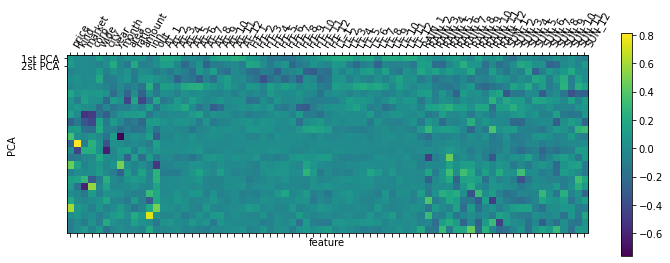

In [114]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1],['1st PCA', '2st PCA'])
plt.colorbar()
plt.xticks(range(len(DF2.columns)),
           DF2.columns, rotation = 60, ha = 'left')
plt.xlabel('feature')
plt.ylabel('PCA')

In [115]:


pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.244334
1     0.410797
2     0.526555
3     0.620585
4     0.695007
5     0.727006
6     0.757679
7     0.782369
8     0.802557
9     0.820273
10    0.836635
11    0.851525
12    0.865425
13    0.878061
14    0.889650
15    0.899884
16    0.909582
17    0.918073
18    0.926086
19    0.933562
20    0.940032
21    0.946412
22    0.952190
23    0.957406
24    0.961933
dtype: float64

In [116]:
pca.explained_variance_ratio_

array([0.24433357, 0.16646315, 0.11575858, 0.09403003, 0.07442188,
       0.03199898, 0.03067275, 0.02468963, 0.02018799, 0.01771684,
       0.01636187, 0.01488962, 0.01389994, 0.01263612, 0.01158944,
       0.01023373, 0.00969767, 0.00849143, 0.00801236, 0.00747665,
       0.00646975, 0.00637981, 0.00577803, 0.00521577, 0.00452763])

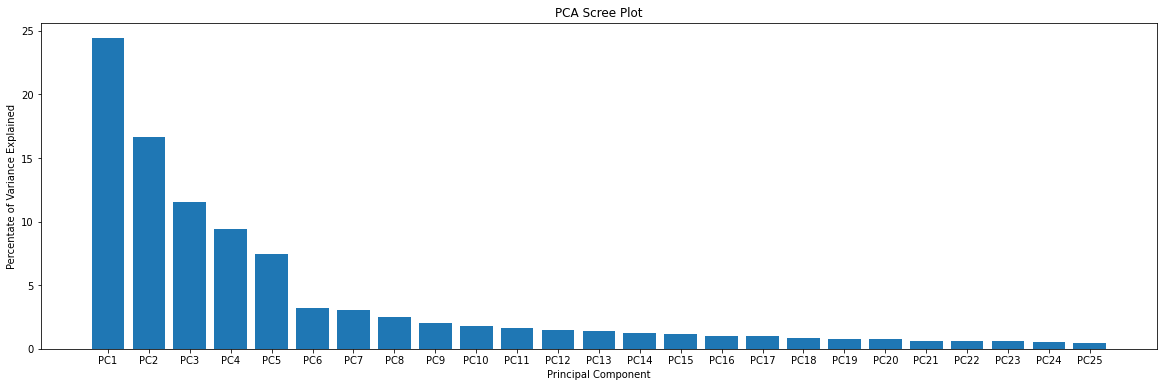

In [117]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')
    
plt.figure(figsize = (20,6))
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

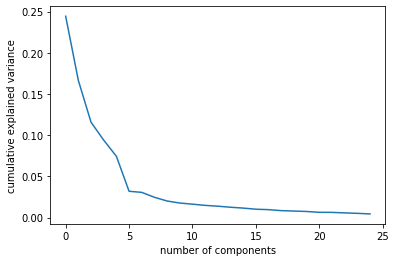

In [118]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#PCA1 is at 0 in xscale

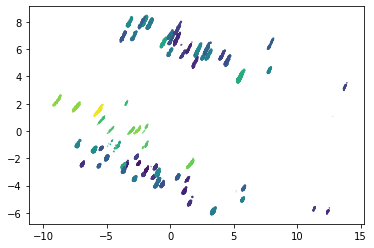

In [119]:
plt.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],X_pca[:,3])

In [138]:
X_pp = pd.DataFrame(X_pca[:,:23], columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23'], index = DF2.price)
X_pp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
price,,,,,,,,,,,,,,,,,,,,,,,
793.00,-0.058765,6.440906,1.606468,-1.304871,-0.006603,1.191666,-0.964371,-0.625951,0.976095,0.333784,-0.042166,-1.248697,0.090627,-0.308727,-0.722902,-0.142903,-2.235613,-0.337264,-0.017640,0.486777,0.395241,-0.293833,0.705859
843.43,-0.095211,6.435122,1.578136,-1.279301,0.027811,1.396717,-0.855079,-0.623903,-0.143423,-0.702463,-0.454991,-1.070347,0.639655,0.206306,-0.777683,-0.034929,-2.200384,-1.076277,1.335975,0.721490,0.424243,-0.366979,0.734041
725.00,-0.115957,6.440808,1.622434,-1.436442,-0.039096,1.366285,-0.347590,-0.700423,-0.771330,-0.451985,-0.742704,-1.376026,-1.484732,1.049784,-0.630506,-0.628571,-2.226498,0.397685,-1.868649,0.102171,0.237385,-0.442951,0.490038
804.59,-0.018727,6.479671,1.620105,-1.337923,-0.083487,1.193291,-0.913606,-0.648587,1.006837,0.294321,0.008242,-1.030970,0.114057,-0.336002,-0.780956,-0.255930,-2.134553,-0.291868,0.008924,0.371656,0.526105,-0.373042,0.392306
890.58,-0.049350,6.485685,1.585516,-1.309429,-0.052083,1.415603,-0.798615,-0.643232,-0.099095,-0.768250,-0.396790,-0.816622,0.641295,0.180741,-0.849932,-0.099488,-2.106392,-1.016745,1.372953,0.607078,0.574052,-0.383097,0.421886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819.59,7.552413,-5.407479,-0.109981,1.722109,-0.601941,1.977777,0.166593,3.347605,2.881541,-3.806488,3.609126,-2.072378,0.170715,-0.827278,-2.047831,-1.181313,0.815869,0.527697,0.276607,-1.074305,-0.635039,-0.548468,0.052983
872.83,13.240063,-4.472002,-1.844010,-1.529728,0.032331,4.612730,0.171182,5.120610,0.031744,0.910186,4.971214,-2.862984,-1.992381,1.405582,-1.832339,-1.221707,1.458062,-2.146298,-0.961599,-2.384245,3.877987,0.034813,0.806537
731.67,13.214490,-4.522484,-1.844226,-1.421701,0.126602,4.758617,-0.089628,5.321414,-0.575532,0.195450,5.009282,-2.887668,0.622778,0.463184,-2.078119,-0.989808,1.543328,-2.229672,-0.699038,-2.313698,3.774981,-0.103468,1.016984


In [139]:
from sklearn.model_selection import train_test_split

X = X_pp
y = X_pp.index



In [140]:
X_train , X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)
print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data', X_test.shape, y_test.shape)

Train Data :  (16653, 23) (16653,)
Test Data (7138, 23) (7138,)


In [141]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression(normalize = True, n_jobs = -1)
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [142]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, MR.predict(X_test))
np.sqrt(mse)

35.10220064485842